In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df = pd.read_excel('Data_candyhierarchy2017.xlsx')
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [3]:
df.isna().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

In [4]:
df.drop(columns=['Internal ID'],inplace=True)

In [5]:
df.isna().sum().sort_values(ascending=False).head(10)

Unnamed: 113                 2451
Q12: MEDIA [Yahoo]           2393
Q12: MEDIA [Daily Dish]      2375
Q12: MEDIA [ESPN]            2361
Q9: OTHER COMMENTS           2074
Q8: DESPAIR OTHER            1743
Q7: JOY OTHER                1549
Q12: MEDIA [Science]         1098
Q6 | JoyJoy (Mit Iodine!)    1026
Q6 | Maynards                1024
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 113','Q12: MEDIA [Yahoo]','Q12: MEDIA [Daily Dish]','Q12: MEDIA [ESPN]',
                'Q9: OTHER COMMENTS','Q8: DESPAIR OTHER','Q7: JOY OTHER','Q12: MEDIA [Science]'],inplace=True)

In [7]:
Q6 = df.columns[df.columns.str.contains('Q6')]

In [8]:
df_Q6 = df.loc[:,Q6]

In [9]:
df_Q6.head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,...,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY


In [10]:
df.drop(columns=Q6,inplace=True)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.dropna(how='all', inplace=True)

In [13]:
df.head()

,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q10: DRESS,Q11: DAY,"Click Coordinates (x, y)"
1,No,Male,44,USA,NM,White and gold,Sunday,"(84, 25)"
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN
3,No,Male,40,us,or,White and gold,Sunday,"(75, 23)"
4,No,Male,23,usa,exton pa,White and gold,Friday,"(70, 10)"
5,No,Male,NaN,NaN,NaN,NaN,NaN,"(75, 23)"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2422 entries, 1 to 2459
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Q1: GOING OUT?                    2335 non-null   object
 1   Q2: GENDER                        2407 non-null   object
 2   Q3: AGE                           2370 non-null   object
 3   Q4: COUNTRY                       2390 non-null   object
 4   Q5: STATE, PROVINCE, COUNTY, ETC  2354 non-null   object
 5   Q10: DRESS                        1716 non-null   object
 6   Q11: DAY                          1735 non-null   object
 7   Click Coordinates (x, y)          1605 non-null   object
dtypes: object(8)
memory usage: 170.3+ KB


### Q1-Going Out?

In [15]:
df['Q1: GOING OUT?'].value_counts()

No     2023
Yes     312
Name: Q1: GOING OUT?, dtype: int64

In [16]:
df['Q1: GOING OUT?'].isna().sum()

87

In [17]:
df['Q1: GOING OUT?'].fillna('No',inplace=True)

In [18]:
df['Q1: GOING OUT?'].isna().sum()

0

### Q2-Gender

In [19]:
df['Q2: GENDER'].value_counts()

Male                  1458
Female                 838
I'd rather not say      81
Other                   30
Name: Q2: GENDER, dtype: int64

In [20]:
df['Q2: GENDER'].isna().sum()

15

In [21]:
df['Q2: GENDER'].replace(['Other',"I'd rather not say"],'Not_Say',inplace=True)

In [22]:
df['Q2: GENDER'].fillna('Not_Say',inplace=True)

In [23]:
df['Q2: GENDER'].isna().sum()

0

### Q3-AGE

In [24]:
df['Q3: AGE'].value_counts()

40                 92
34                 90
37                 89
43                 86
42                 79
                   ..
older than dirt     1
5u                  1
Enough              1
See question 2      1
60+                 1
Name: Q3: AGE, Length: 106, dtype: int64

In [25]:
df['Q3: AGE'].unique()

array([44, 49, 40, 23, nan, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [26]:
df['Q3: AGE'].replace(['Old enough','Many','?','no','45-55','hahahahaha','Enough','5u',
                      'older than dirt','See question 2','24-50','Over 50','sixty-nine',
                       '46 Halloweens.','ancient','OLD', 'old','MY NAME JEFF',
                      '59 on the day after Halloween','old enough', 'your mom',
                      'I can remember when Java was a cool new language','60+',1000],np.nan,
                      inplace=True)

In [27]:
df['Q3: AGE'].unique()

array([ 44. ,  49. ,  40. ,  23. ,   nan,  53. ,  33. ,  43. ,  56. ,
        64. ,  37. ,  59. ,  48. ,  54. ,  36. ,  45. ,  25. ,  34. ,
        35. ,  38. ,  58. ,  50. ,  47. ,  16. ,  52. ,  63. ,  65. ,
        41. ,  27. ,  31. ,  61. ,  46. ,  42. ,  62. ,  29. ,  39. ,
        32. ,  28. ,  69. ,  67. ,  30. ,  22. ,  26. ,  51. ,  70. ,
        24. ,  18. ,  19. ,  57. ,  60. ,  66. ,  12. ,  55. ,  72. ,
        21. ,  11. ,   9. ,  68. ,  20. ,   6. ,  10. ,  71. ,  90. ,
        13. , 312. ,  99. ,   7. ,  88. ,  39.4,  74. , 102. ,  17. ,
        15. ,   8. ,  75. ,  14. , 100. ,  76. ,  77. ,  73. ,  70.5,
         1. ,   4. ])

<AxesSubplot:>

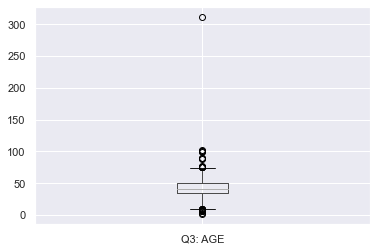

In [28]:
df.boxplot(column=['Q3: AGE'])

In [29]:
q1 = df['Q3: AGE'].quantile(0.25)
q1

34.0

In [30]:
q3 = df['Q3: AGE'].quantile(0.75)
q3

50.0

In [31]:
iqr = q3 - q1
iqr

16.0

In [32]:
min_val = q1 - (1.5*iqr)
max_val = q3 + (1.5*iqr)

In [33]:
outliers = df[(df['Q3: AGE'] < min_val) | (df['Q3: AGE'] > max_val)]['Q3: AGE']
outliers

379       9.0
414       6.0
451      90.0
506     312.0
575      99.0
627       7.0
705       9.0
728      88.0
884     102.0
943       8.0
987      75.0
1054      9.0
1223     75.0
1308      8.0
1371      7.0
1411     90.0
1441    100.0
1479      9.0
1488     76.0
1490      6.0
1495    100.0
1830     77.0
2010     75.0
2212      1.0
2294      4.0
2329     76.0
Name: Q3: AGE, dtype: float64

In [34]:
df['Q3: AGE'].replace(list(outliers),np.nan,inplace=True)

<AxesSubplot:>

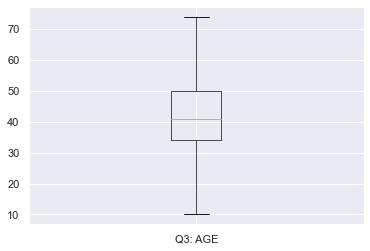

In [35]:
df.boxplot(column=['Q3: AGE'])

In [36]:
df['Q3: AGE'].fillna(df['Q3: AGE'].mean(),inplace=True)

In [37]:
df['Q3: AGE'] = df['Q3: AGE'].astype('int')

### Q4-COUNTRY

In [38]:
df['Q4: COUNTRY'].unique()

array(['USA ', 'USA', 'us', 'usa', nan, 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [39]:
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.upper().str.strip()

In [40]:
df['Q4: COUNTRY'].value_counts()

USA                         1125
UNITED STATES                591
CANADA                       224
US                           182
UNITED STATES OF AMERICA      73
                            ... 
UNITED SATES                   1
KOREA                          1
CALIFORNIA                     1
SOUTH AFRICA                   1
FEAR AND LOATHING              1
Name: Q4: COUNTRY, Length: 90, dtype: int64

In [41]:
from fuzzywuzzy import process
usa = ['USA','AMERICA','UNITED STATES','UNITED KINGDOM','GERMANY','AUSTRALIA']
for state in usa:
    matches = process.extract(state, df['Q4: COUNTRY'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df.loc[df['Q4: COUNTRY'] == potential_match[0],'Q4: COUNTRY'] = state

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [42]:
df['Q4: COUNTRY'].value_counts()

USA                  1314
UNITED STATES         624
CANADA                224
AMERICA                83
UK                     18
                     ... 
CALIFORNIA              1
UAE                     1
SOUTH AFRICA            1
ICELAND                 1
FEAR AND LOATHING       1
Name: Q4: COUNTRY, Length: 62, dtype: int64

In [43]:
df['Q4: COUNTRY'].unique()

array(['USA', nan, 'CANADA', 'MURICA', 'UNITED STATES', 'UK',
       'UNITED KINGDOM', 'AMERICA', 'UAE', 'ENGLAND', 'MEXICO', 'U.S.A.',
       'FRANCE', 'FINLAND', 'US OF A', 'NORTH CAROLINA', 'NETHERLANDS',
       'GERMANY', 'EUROPE', 'EARTH', 'U.K.', 'COSTA RICA', 'CASCADIA',
       'AUSTRALIA', 'INSANITY LATELY', 'GREECE',
       'USA? HARD TO TELL ANYMORE..', 'PITTSBURGH', 'CAN', 'CANAE',
       'NEW YORK', 'TRUMPISTAN', 'IRELAND', 'KOREA', 'CALIFORNIA',
       'JAPAN', 'SOUTH AFRICA', 'ICELAND', 'CANADA`', 'SCOTLAND',
       'DENMARK', 'SWITZERLAND', 'UD', 'SOUTH KOREA', 'NEW JERSEY',
       'INDONESIA', 'THE NETHERLANDS', 'ENDLAND', 'ATLANTIS', 'MURRIKA',
       'ALASKA', 'SOVIET CANUCKISTAN', 'SINGAPORE', 'CHINA', 'TAIWAN',
       'HONG KONG', 'SPAIN', 'SWEDEN', 'NARNIA', 'U S A',
       'SUBSCRIBE TO DM4UZ3 ON YOUTUBE', "I DON'T KNOW ANYMORE",
       'FEAR AND LOATHING'], dtype=object)

In [44]:
df['Q4: COUNTRY'].replace(['AMERICA','UNITED STATES','U S A','U.S.A.','US OF A','USA? HARD TO TELL ANYMORE..'],'USA',inplace=True)

In [45]:
df['Q4: COUNTRY'].value_counts().head()

USA               2035
CANADA             224
UK                  18
UNITED KINGDOM      14
GERMANY             10
Name: Q4: COUNTRY, dtype: int64

In [46]:
df['Q4: COUNTRY'].replace('UNITED KINGDOM','UK',inplace=True)

In [47]:
df['Q4: COUNTRY'].value_counts().head()

USA          2035
CANADA        224
UK             32
GERMANY        10
AUSTRALIA       7
Name: Q4: COUNTRY, dtype: int64

In [48]:
df['Q4: COUNTRY'].isna().sum()

37

In [49]:
df['Q4: COUNTRY'].fillna('USA',inplace=True)

### Q5: STATE, PROVINCE, COUNTY, ETC

In [50]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].value_counts().head(8)

California    131
CA             88
Texas          60
Ontario        56
Illinois       55
Oregon         50
New York       42
WA             40
Name: Q5: STATE, PROVINCE, COUNTY, ETC, dtype: int64

In [51]:
states = ['CALIFORNIA','ONTARIO','ILLINOIS','TEXAS','OREGON']
for state in states:
    matches = process.extract(state, df['Q5: STATE, PROVINCE, COUNTY, ETC'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df.loc[df['Q5: STATE, PROVINCE, COUNTY, ETC'] == potential_match[0],'Q5: STATE, PROVINCE, COUNTY, ETC'] = state

In [52]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].value_counts().head(8)

CALIFORNIA    344
ILLINOIS      118
ONTARIO        99
TEXAS          72
OREGON         63
New York       42
WA             40
NY             37
Name: Q5: STATE, PROVINCE, COUNTY, ETC, dtype: int64

In [53]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].isna().sum()

68

In [54]:
df['Q5: STATE, PROVINCE, COUNTY, ETC'].fillna('CALIFORNIA',inplace=True)

### Q10-DRESS

In [55]:
df.iloc[:,-5:]

,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q10: DRESS,Q11: DAY,"Click Coordinates (x, y)"
1,USA,NM,White and gold,Sunday,"(84, 25)"
2,USA,Virginia,NaN,NaN,NaN
3,USA,CALIFORNIA,White and gold,Sunday,"(75, 23)"
4,USA,exton pa,White and gold,Friday,"(70, 10)"
5,USA,CALIFORNIA,NaN,NaN,"(75, 23)"
...,...,...,...,...,...
2455,USA,MD,White and gold,Friday,NaN
2456,USA,New York,Blue and black,Friday,"(70, 26)"
2457,USA,Tennessee,Blue and black,Friday,"(67, 35)"
2458,USA,North Carolina,NaN,NaN,NaN


In [56]:
df['Q10: DRESS'].value_counts()

White and gold    1081
Blue and black     635
Name: Q10: DRESS, dtype: int64

In [57]:
df['Q10: DRESS'].isna().sum()

706

In [58]:
df['Q10: DRESS'].fillna('White and gold',inplace=True)

### Q11: DAY

In [59]:
df['Q11: DAY'].value_counts()

Friday    1091
Sunday     644
Name: Q11: DAY, dtype: int64

In [60]:
df['Q11: DAY'].isna().sum()

687

In [61]:
df['Q11: DAY'].fillna('Friday',inplace=True)

### Click Coordinates (x, y)

In [62]:
coordinates = df['Click Coordinates (x, y)'].str.split(',', expand = True)
coordinates

,0,1
1,(84,25)
2,NaN,NaN
3,(75,23)
4,(70,10)
5,(75,23)
...,...,...
2455,NaN,NaN
2456,(70,26)
2457,(67,35)
2458,NaN,NaN


In [63]:
coordinates[0] = coordinates[0].str.replace('(','')
coordinates[1] = coordinates[1].str.replace(')','')

C:\Users\Dell\AppData\Local\Temp/ipykernel_14620/2154703281.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coordinates[0] = coordinates[0].str.replace('(','')
C:\Users\Dell\AppData\Local\Temp/ipykernel_14620/2154703281.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coordinates[1] = coordinates[1].str.replace(')','')


In [64]:
coordinates.rename(columns={0:'Coordinates_x', 1:'Coordinates_y'},inplace=True)

In [65]:
coordinates.fillna(0,inplace=True)

In [66]:
coordinates['Coordinates_x'] = coordinates['Coordinates_x'].astype('int')
coordinates['Coordinates_y'] = coordinates['Coordinates_y'].astype('int')

In [67]:
coordinates['Coordinates_x'].value_counts()

0     817
76     89
74     84
73     83
77     82
     ... 
39      1
13      1
98      1
15      1
12      1
Name: Coordinates_x, Length: 78, dtype: int64

In [68]:
coordinates['Coordinates_x'].replace(0,76,inplace=True)

In [69]:
coordinates['Coordinates_y'].value_counts()

0     818
31     76
5      75
26     75
24     69
     ... 
51      1
2       1
50      1
48      1
64      1
Name: Coordinates_y, Length: 89, dtype: int64

In [70]:
coordinates['Coordinates_y'].replace(0,31,inplace=True)

In [71]:
df.drop(columns=['Click Coordinates (x, y)'],inplace=True)

In [72]:
edit_list = []
for i in list(df.columns):
    i = i.replace(i[:4],'').strip()
    edit_list.append(i)

In [73]:
edit_list

['GOING OUT?',
 'GENDER',
 'AGE',
 'COUNTRY',
 'STATE, PROVINCE, COUNTY, ETC',
 'DRESS',
 'DAY']

In [74]:
df.columns = edit_list

In [75]:
df.rename(columns={'STATE, PROVINCE, COUNTY, ETC':'STATE'},inplace=True)

In [76]:
df

,GOING OUT?,GENDER,AGE,COUNTRY,STATE,DRESS,DAY
1,No,Male,44,USA,NM,White and gold,Sunday
2,No,Male,49,USA,Virginia,White and gold,Friday
3,No,Male,40,USA,CALIFORNIA,White and gold,Sunday
4,No,Male,23,USA,exton pa,White and gold,Friday
5,No,Male,42,USA,CALIFORNIA,White and gold,Friday
...,...,...,...,...,...,...,...
2455,No,Male,24,USA,MD,White and gold,Friday
2456,No,Female,33,USA,New York,Blue and black,Friday
2457,No,Female,26,USA,Tennessee,Blue and black,Friday
2458,No,Male,58,USA,North Carolina,White and gold,Friday


In [77]:
df['Coordinates_x'] = coordinates['Coordinates_x']
df['Coordinates_y'] = coordinates['Coordinates_y']

In [78]:
df.head()

,GOING OUT?,GENDER,AGE,COUNTRY,STATE,DRESS,DAY,Coordinates_x,Coordinates_y
1,No,Male,44,USA,NM,White and gold,Sunday,84,25
2,No,Male,49,USA,Virginia,White and gold,Friday,76,31
3,No,Male,40,USA,CALIFORNIA,White and gold,Sunday,75,23
4,No,Male,23,USA,exton pa,White and gold,Friday,70,10
5,No,Male,42,USA,CALIFORNIA,White and gold,Friday,75,23


In [79]:
df.isna().sum()

GOING OUT?       0
GENDER           0
AGE              0
COUNTRY          0
STATE            0
DRESS            0
DAY              0
Coordinates_x    0
Coordinates_y    0
dtype: int64

### Q6-Joy Or Despair

In [80]:
df_Q6.isna().sum()

Q6 | 100 Grand Bar                                                                        747
Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    734
Q6 | Any full-sized candy bar                                                             672
Q6 | Black Jacks                                                                          958
Q6 | Bonkers (the candy)                                                                  992
                                                                                         ... 
Q6 | Vicodin                                                                              789
Q6 | Whatchamacallit Bars                                                                 823
Q6 | White Bread                                                                          757
Q6 | Whole Wheat anything                                                                 747
Q6 | York Peppermint Patties                                

In [81]:
df_Q6.head()

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,...,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything,Q6 | York Peppermint Patties
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY


In [82]:
df_Q6.shape

(2460, 103)

In [83]:
df_Q6.drop_duplicates(inplace=True)

In [84]:
df_Q6.shape

(1804, 103)

In [85]:
df_Q6.dropna(how='all',inplace=True)

In [86]:
df_Q6.shape

(1803, 103)

In [87]:
df_Q6.columns

Index(['Q6 | 100 Grand Bar',
       'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Q6 | Any full-sized candy bar', 'Q6 | Black Jacks',
       'Q6 | Bonkers (the candy)', 'Q6 | Bonkers (the board game)',
       'Q6 | Bottle Caps', 'Q6 | Box'o'Raisins', 'Q6 | Broken glow stick',
       'Q6 | Butterfinger',
       ...
       'Q6 | Three Musketeers', 'Q6 | Tolberone something or other',
       'Q6 | Trail Mix', 'Q6 | Twix',
       'Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Q6 | Vicodin', 'Q6 | Whatchamacallit Bars', 'Q6 | White Bread',
       'Q6 | Whole Wheat anything', 'Q6 | York Peppermint Patties'],
      dtype='object', length=103)

In [88]:
edit_list = []
for i in list(df_Q6.columns):
    i = i.replace(i[:4],'').strip()
    edit_list.append(i)

In [89]:
df_Q6.columns = edit_list

In [90]:
df_Q6.columns

Index(['100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       'Bonkers (the board game)', 'Bottle Caps', 'Box'o'Raisins',
       'Broken glow stick', 'Butterfinger',
       ...
       'Three Musketeers', 'Tolberone something or other', 'Trail Mix', 'Twix',
       'Vials of pure high fructose corn syrup, for main-lining into your vein',
       'Vicodin', 'Whatchamacallit Bars', 'White Bread',
       'Whole Wheat anything', 'York Peppermint Patties'],
      dtype='object', length=103)

In [91]:
df_Q6.isna().sum().sort_values(ascending=False).head(10)

JoyJoy (Mit Iodine!)                           369
Maynards                                       367
Reggie Jackson Bar                             357
Bonkers (the board game)                       349
Sweetums (a friend to diabetes)                345
Bonkers (the candy)                            335
Black Jacks                                    301
Chick-o-Sticks (we don’t know what that is)    289
Kinder Happy Hippo                             288
Abstained from M&M'ing.                        285
dtype: int64

In [92]:
df_Q6.mode()

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
0,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY


In [93]:
df_Q6.fillna(df_Q6.mode,inplace=True)

In [94]:
df_Q6.mode()

,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,...,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties
0,JOY,DESPAIR,JOY,DESPAIR,MEH,MEH,MEH,DESPAIR,DESPAIR,JOY,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY


In [95]:
df_Q6.isna().sum().sort_values(ascending=False)

100 Grand Bar                                         0
Mint Juleps                                           0
Reese’s Peanut Butter Cups                            0
Real Housewives of Orange County Season 9 Blue-Ray    0
Pixy Stix                                             0
                                                     ..
Healthy Fruit                                         0
Hard Candy                                            0
Gummy Bears straight up                               0
Gum from baseball cards                               0
York Peppermint Patties                               0
Length: 103, dtype: int64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2422 entries, 1 to 2459
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   GOING OUT?     2422 non-null   object
 1   GENDER         2422 non-null   object
 2   AGE            2422 non-null   int32 
 3   COUNTRY        2422 non-null   object
 4   STATE          2422 non-null   object
 5   DRESS          2422 non-null   object
 6   DAY            2422 non-null   object
 7   Coordinates_x  2422 non-null   int32 
 8   Coordinates_y  2422 non-null   int32 
dtypes: int32(3), object(6)
memory usage: 160.8+ KB


In [97]:
df['GOING OUT?'] = df['GOING OUT?'].astype('category')

In [98]:
df['GENDER'] = df['GENDER'].astype('category')
df['COUNTRY'] = df['COUNTRY'].astype('category')
df['STATE'] = df['STATE'].astype('category')
df['DAY'] = df['DAY'].astype('category')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2422 entries, 1 to 2459
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   GOING OUT?     2422 non-null   category
 1   GENDER         2422 non-null   category
 2   AGE            2422 non-null   int32   
 3   COUNTRY        2422 non-null   category
 4   STATE          2422 non-null   category
 5   DRESS          2422 non-null   object  
 6   DAY            2422 non-null   category
 7   Coordinates_x  2422 non-null   int32   
 8   Coordinates_y  2422 non-null   int32   
dtypes: category(5), int32(3), object(1)
memory usage: 102.9+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GENDER', ylabel='count'>

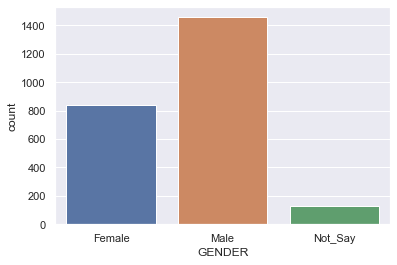

In [100]:
sns.countplot('GENDER',data=df)

In [101]:
greaterCountries = df['COUNTRY'].value_counts().head(5)

<AxesSubplot:ylabel='COUNTRY'>

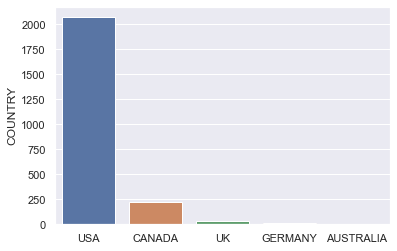

In [102]:
sns.barplot(x=['USA','CANADA','UK','GERMANY','AUSTRALIA'],y=greaterCountries)

In [103]:
df['STATE'].value_counts()

CALIFORNIA         412
ILLINOIS           118
ONTARIO             99
TEXAS               72
OREGON              63
                  ... 
New Mexico, USA      1
New Hampshire        1
New Hampshire        1
Nc                   1
Ørbæk                1
Name: STATE, Length: 443, dtype: int64

<AxesSubplot:ylabel='STATE'>

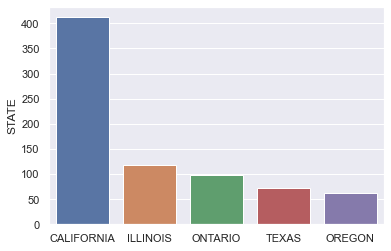

In [104]:
sns.barplot(x=['CALIFORNIA','ILLINOIS','ONTARIO','TEXAS','OREGON'], y=df['STATE'].value_counts().head(5))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DAY', ylabel='count'>

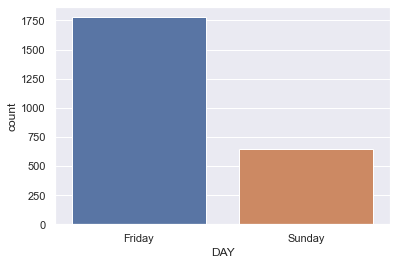

In [105]:
sns.countplot('DAY',data=df)

<AxesSubplot:xlabel='DRESS', ylabel='count'>

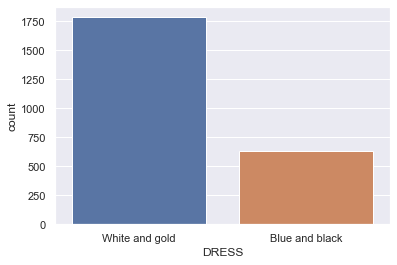

In [106]:
sns.countplot('DRESS',data=df)

<AxesSubplot:xlabel='Coordinates_x', ylabel='Coordinates_y'>

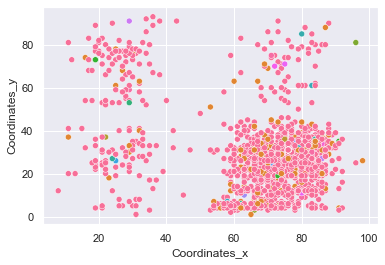

In [107]:
sns.scatterplot(x='Coordinates_x',y='Coordinates_y',data=df,hue='COUNTRY',legend=None,)

(array([ 39.,  55., 176., 414., 480., 600., 322., 212.,  85.,  39.]),
 array([10. , 16.4, 22.8, 29.2, 35.6, 42. , 48.4, 54.8, 61.2, 67.6, 74. ]),
 <BarContainer object of 10 artists>)

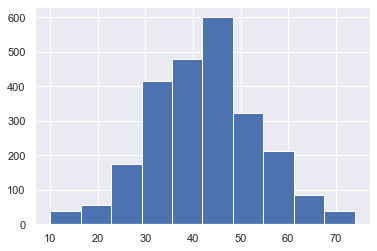

In [108]:
plt.hist(df['AGE'])